In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('6_pickup.csv')

# Display the first few rows of the dataset
print(data.head())

# Display the number of rows and columns
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Display the column names
print(f"Column names: {data.columns.tolist()}")

               report_date   stay_date  hotel_id  dynamic_rooms  \
0  2022-01-02 00:00:00.000  2022-01-02         6           24.0   
1  2022-01-02 00:00:00.000  2022-01-03         6           10.0   
2  2022-01-02 00:00:00.000  2022-01-04         6            9.0   
3  2022-01-02 00:00:00.000  2022-01-05         6           14.0   
4  2022-01-02 00:00:00.000  2022-01-06         6           18.0   

   dynamic_room_revenue  static_rooms  static_room_revenue  other_rooms  \
0               2393.54           NaN                  NaN          1.0   
1               1138.41           NaN                  NaN          1.0   
2                880.70           NaN                  NaN          1.0   
3               1641.98           NaN                  NaN          1.0   
4               2141.75           NaN                  NaN          1.0   

   other_room_revenue  total_rooms  total_room_revenue  
0                 0.0           25             2393.54  
1                 0.0           

Available stay dates: Index([2022-01-02, 2022-01-03, 2022-01-04, 2022-01-05, 2022-01-06, 2022-01-07,
       2022-01-08, 2022-01-09, 2022-01-10, 2022-01-11,
       ...
       2025-06-27, 2025-06-28, 2025-06-29, 2025-06-30, 2025-07-06, 2025-07-07,
       2025-07-08, 2025-07-09, 2025-07-10, 2025-07-11],
      dtype='object', name='stay_date', length=1175)


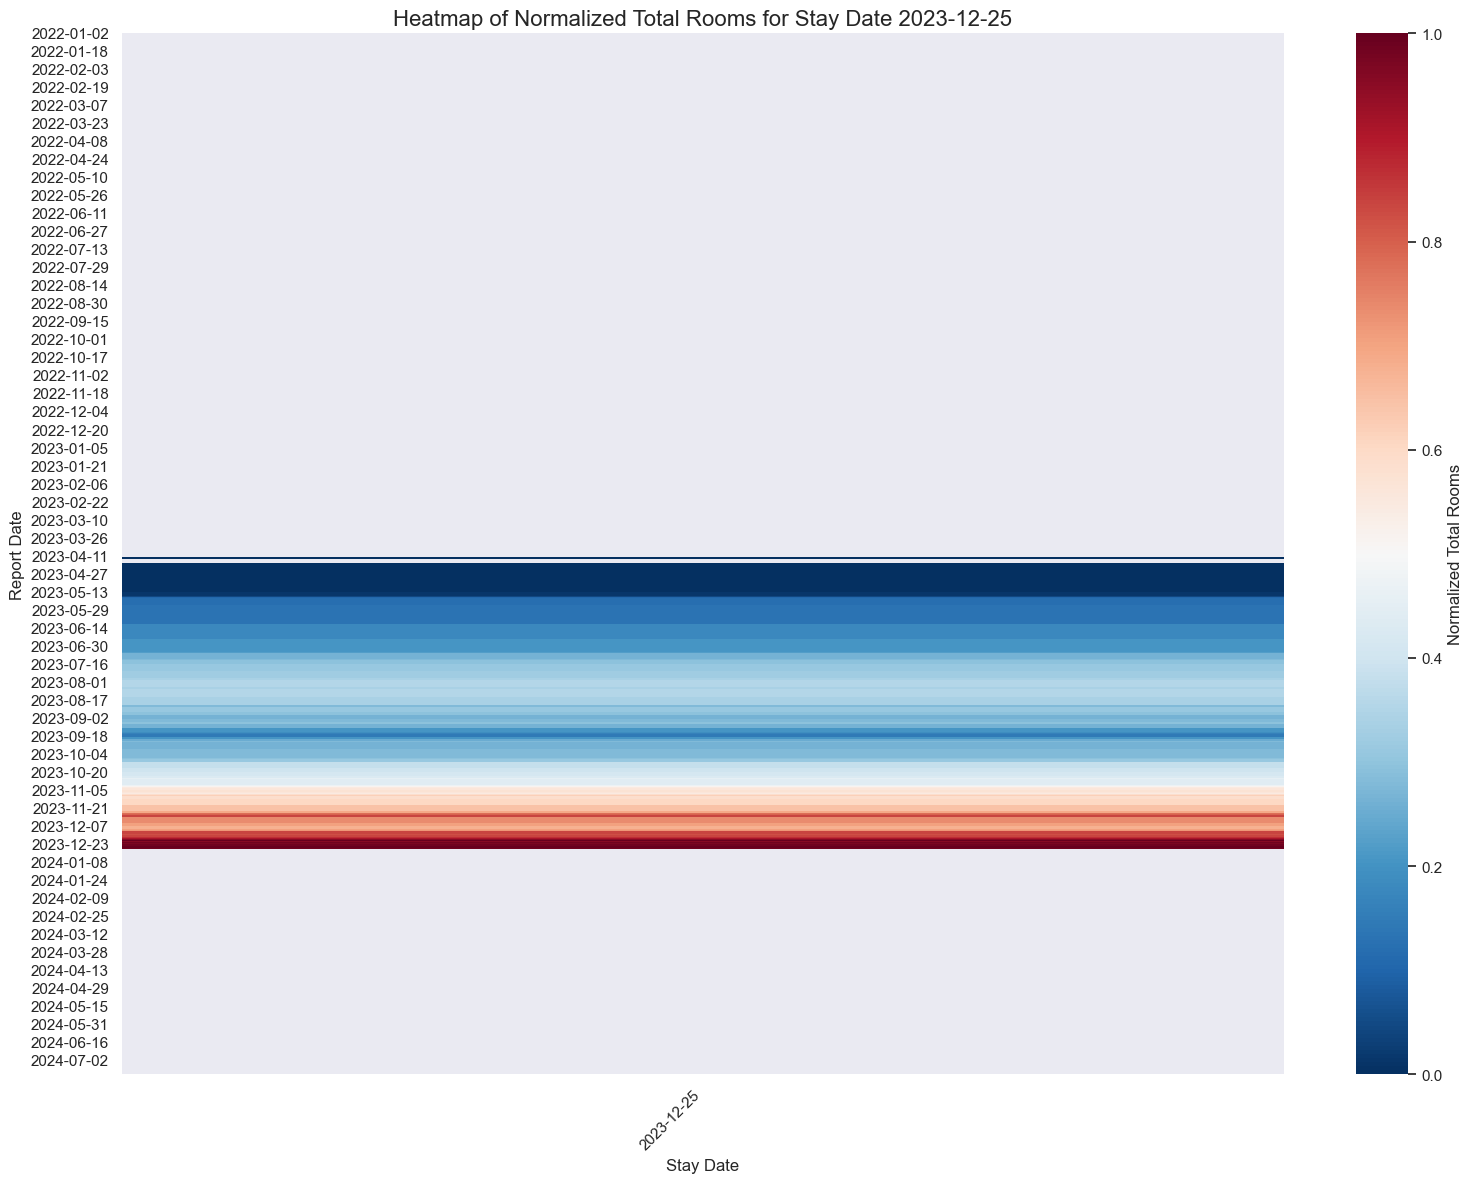

In [3]:
# Load the data
data = pd.read_csv('6_pickup.csv')

# Convert 'report_date' and 'stay_date' to datetime and then to date
data['report_date'] = pd.to_datetime(data['report_date']).dt.date
data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date

# Create a pivot table
pivot_data = data.pivot_table(values='total_rooms', index='report_date', columns='stay_date', aggfunc='sum')

# Normalize the data to 0-1 range
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(pivot_data), 
                               index=pivot_data.index, 
                               columns=pivot_data.columns)

# Print available stay dates to ensure the date exists
print("Available stay dates:", normalized_data.columns)

# Filter the data for a specific stay date
specific_stay_date = pd.to_datetime('2023-12-25').date()  # Ensure correct format
if specific_stay_date in normalized_data.columns:
    filtered_data = normalized_data[[specific_stay_date]]

    # Set up the plot style
    sns.set(style="dark")

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(16, 12))

    # Create the heatmap using seaborn
    sns.heatmap(filtered_data, cmap='RdBu_r', annot=False, fmt='.2f', 
                cbar_kws={'label': 'Normalized Total Rooms'}, ax=ax, vmin=0, vmax=1)

    # Set title and labels
    ax.set_title(f'Heatmap of Normalized Total Rooms for Stay Date {specific_stay_date}', fontsize=16)
    ax.set_xlabel('Stay Date', fontsize=12)
    ax.set_ylabel('Report Date', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Remove gridlines
    ax.grid(False)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"Stay date {specific_stay_date} not found in the data.")

Available stay dates: Index([2022-01-02, 2022-01-03, 2022-01-04, 2022-01-05, 2022-01-06, 2022-01-07,
       2022-01-08, 2022-01-09, 2022-01-10, 2022-01-11,
       ...
       2025-06-27, 2025-06-28, 2025-06-29, 2025-06-30, 2025-07-06, 2025-07-07,
       2025-07-08, 2025-07-09, 2025-07-10, 2025-07-11],
      dtype='object', name='stay_date', length=1175)


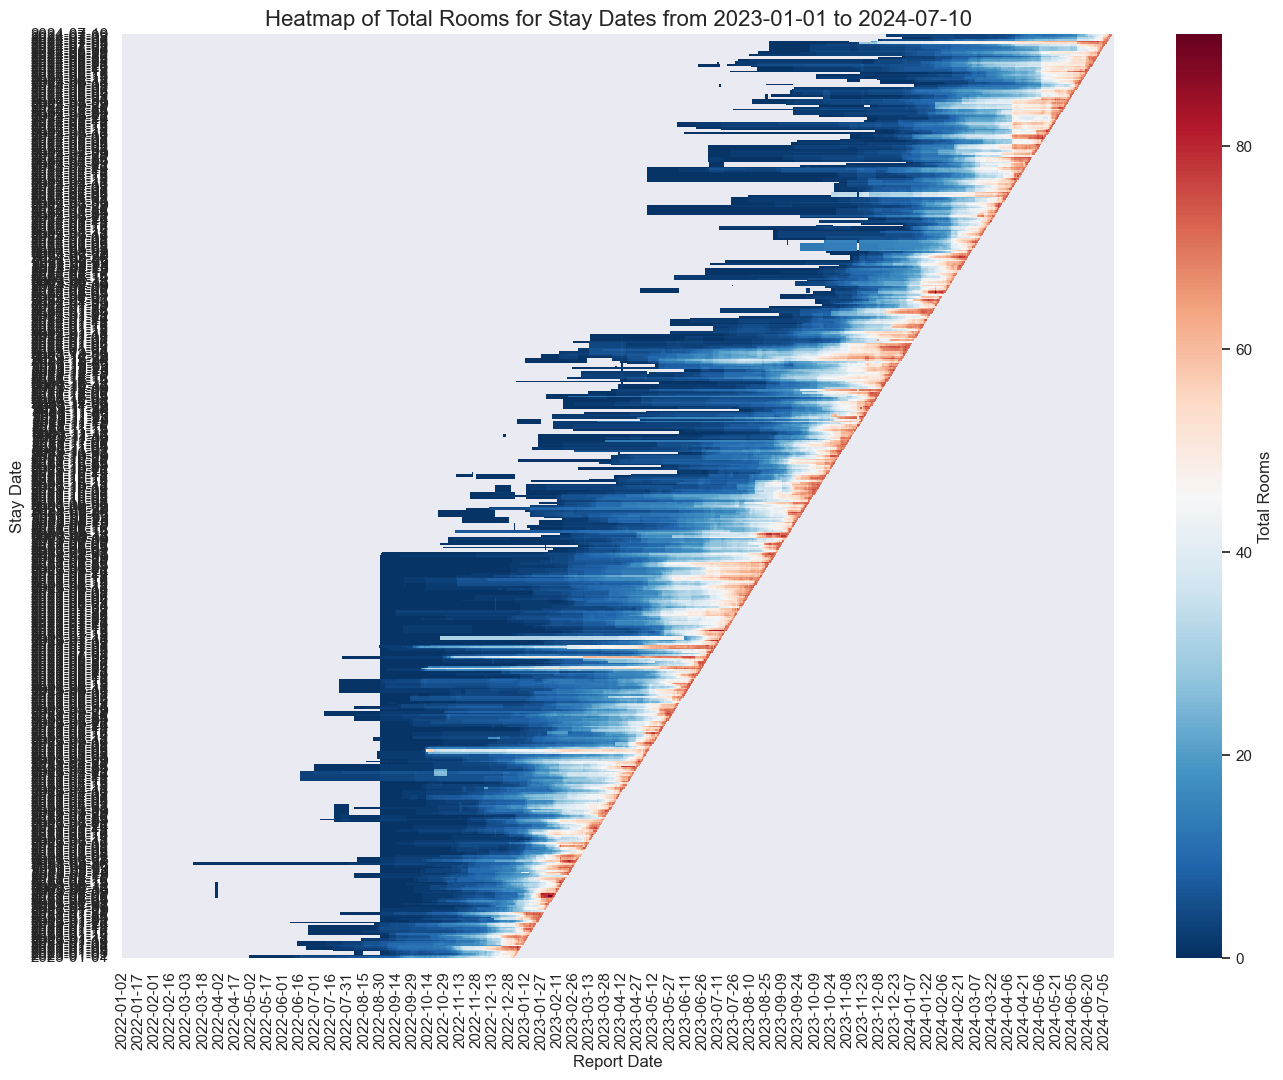

In [4]:
# Load the data
data = pd.read_csv('6_pickup.csv')

# Convert 'report_date' and 'stay_date' to datetime and then to date
data['report_date'] = pd.to_datetime(data['report_date']).dt.date
data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date

# Create a pivot table
pivot_data = data.pivot_table(values='total_rooms', index='report_date', columns='stay_date', aggfunc='sum')

# Sort the index (report_date) and columns (stay_date)
pivot_data = pivot_data.sort_index()
pivot_data = pivot_data.reindex(columns=sorted(pivot_data.columns))

# Print available stay dates to ensure the date exists
print("Available stay dates:", pivot_data.columns)

# Filter the data for a range of stay dates
start_date = pd.to_datetime('2023-01-1').date()  # Start of the range
end_date = pd.to_datetime('2024-07-10').date()  # End of the range

# Select the date range
date_range = pd.date_range(start=start_date, end=end_date).date
filtered_data = pivot_data.loc[:, pivot_data.columns.isin(date_range)]

# Check if the filtered data is not empty
if not filtered_data.empty:
    # Set up the plot style
    sns.set(style="dark")
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(16, 12))
    
    # Reverse the order of the stay dates (y-axis)
    stay_dates = filtered_data.columns[::-1]
    
    # Create the heatmap using seaborn
    sns.heatmap(filtered_data.T.loc[stay_dates], cmap='RdBu_r', annot=False, fmt='.0f',
                cbar_kws={'label': 'Total Rooms'}, ax=ax, yticklabels=stay_dates)
    
    # Set title and labels
    ax.set_title(f'Heatmap of Total Rooms for Stay Dates from {start_date} to {end_date}', fontsize=16)
    ax.set_xlabel('Report Date', fontsize=12)
    ax.set_ylabel('Stay Date', fontsize=12)
    
    # Rotate y-axis labels for better readability
    plt.yticks(rotation=0)
    
    # Remove gridlines
    ax.grid(False)
    
    # Adjust layout and display the plot
    plt.show()
else:
    print(f"No data found for stay dates from {start_date} to {end_date}.")


In [58]:
df = pd.read_csv('pickup_6_reformatted.csv')
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y-%m-%d') # Use capital Y for four-digit year
df['stay_date'] = pd.to_datetime(df['stay_date'], dayfirst=True)

In [76]:
result = df
result.loc[:, 'daily_pickup'] = result['total_rooms'].diff()
result.fillna(0, inplace=True)

In [77]:
result = result[['report_date', 'stay_date', 'total_rooms', 'daily_pickup']]
print(result)

       report_date  stay_date  total_rooms  daily_pickup
0       2022-01-02 2022-01-02           25           0.0
1       2022-01-02 2022-01-03           11         -14.0
2       2022-01-02 2022-01-04           10          -1.0
3       2022-01-02 2022-01-05           15           5.0
4       2022-01-02 2022-01-06           19           4.0
...            ...        ...          ...           ...
205037  2024-03-20 2025-01-27            2           0.0
205038  2024-03-20 2025-01-28            2           0.0
205039  2024-03-20 2025-01-29            2           0.0
205040  2024-03-20 2025-01-30            2           0.0
205041  2024-03-20 2025-01-31            2           0.0

[205042 rows x 4 columns]


/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_43209/2062192769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['report_date'] = pd.to_datetime(data['report_date']).dt.date
/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_43209/2062192769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date


Available stay dates: Index([2022-01-02, 2022-01-03, 2022-01-04, 2022-01-05, 2022-01-06, 2022-01-07,
       2022-01-08, 2022-01-09, 2022-01-10, 2022-01-11,
       ...
       2024-12-31, 2025-01-01, 2025-01-24, 2025-01-25, 2025-01-26, 2025-01-27,
       2025-01-28, 2025-01-29, 2025-01-30, 2025-01-31],
      dtype='object', name='stay_date', length=1089)


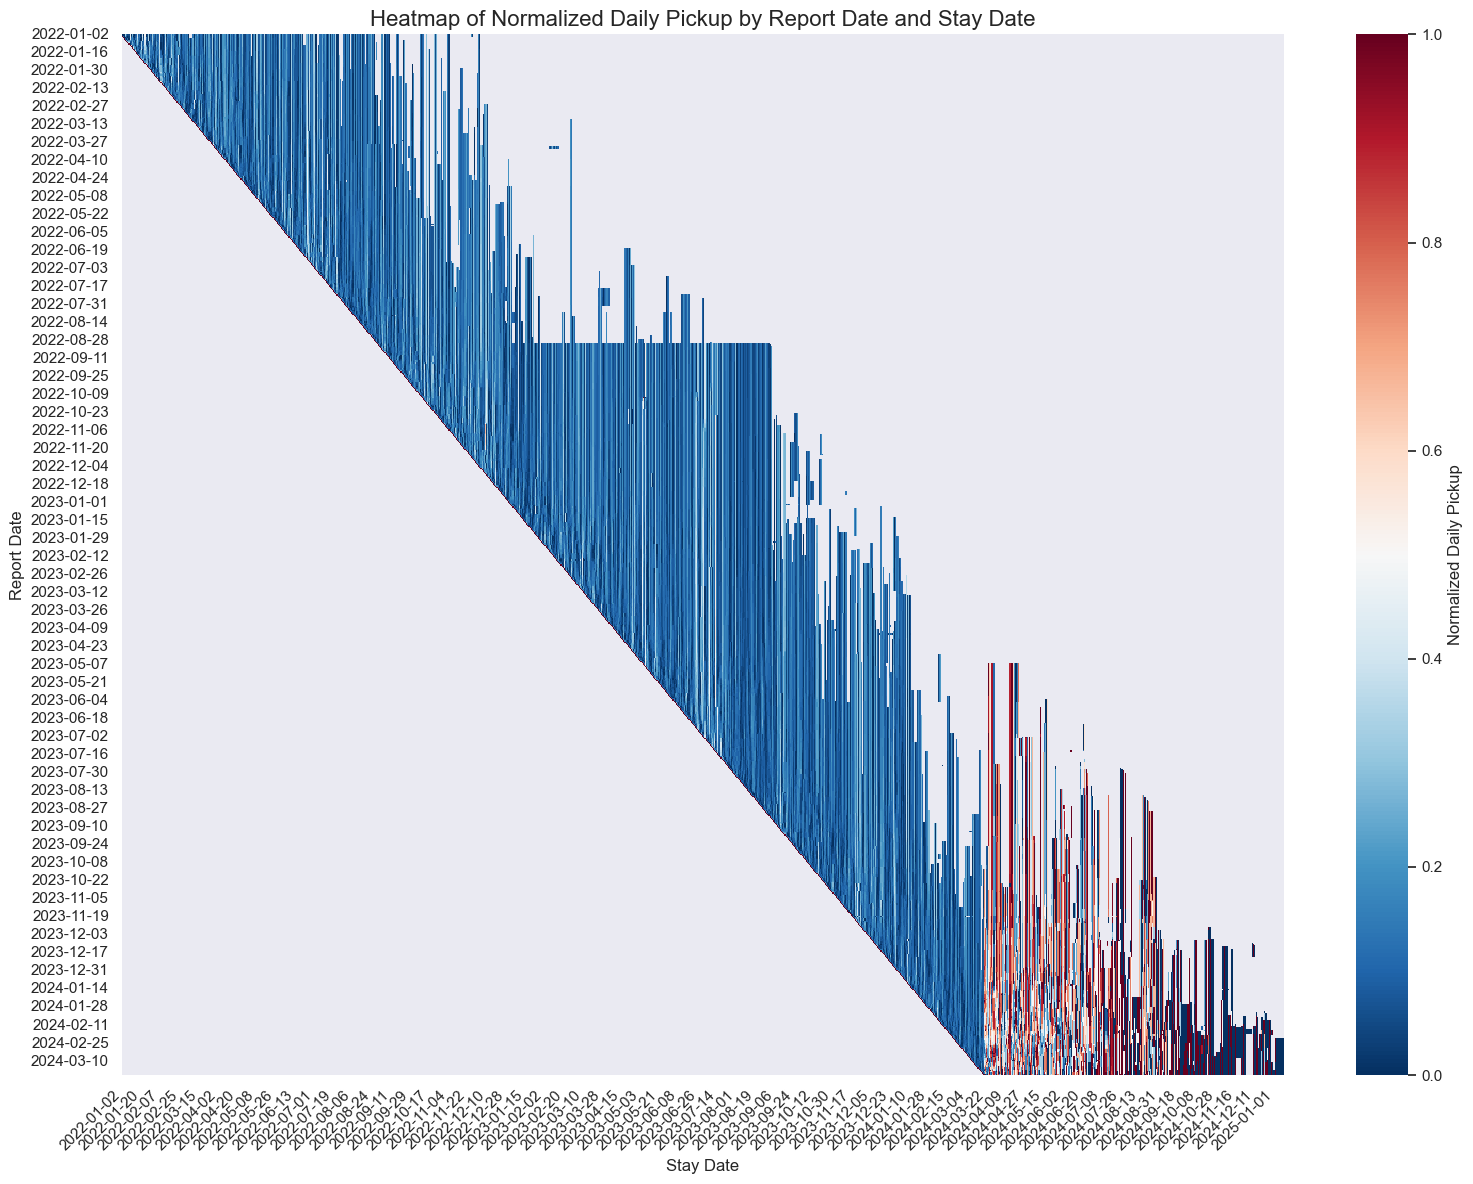

In [80]:
# Filter the data to include only the necessary columns
data = result[['report_date', 'stay_date', 'daily_pickup']]

# Convert 'report_date' and 'stay_date' to datetime format and remove the time
data['report_date'] = pd.to_datetime(data['report_date']).dt.date
data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date

# Create a pivot table with 'daily_pickup' as the values
pivot_data = data.pivot_table(values='daily_pickup', index='report_date', columns='stay_date')

normalized_data = pd.DataFrame(scaler.fit_transform(pivot_data), 
                               index=pivot_data.index, 
                               columns=pivot_data.columns)

# Print available stay dates to ensure the dates are correct
print("Available stay dates:", normalized_data.columns)

# Set up the plot style
sns.set(style="dark")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(16, 12))

# Create the heatmap using seaborn
sns.heatmap(normalized_data, cmap='RdBu_r', annot=False, fmt='.2f', 
            cbar_kws={'label': 'Normalized Daily Pickup'}, ax=ax, vmin=0, vmax=1)

# Set title and labels
ax.set_title('Heatmap of Normalized Daily Pickup by Report Date and Stay Date', fontsize=16)
ax.set_xlabel('Stay Date', fontsize=12)
ax.set_ylabel('Report Date', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove gridlines
ax.grid(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_43209/164709268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['report_date'] = pd.to_datetime(data['report_date']).dt.date
/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_43209/164709268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date


NaN values found in the pivot table. Filling NaN values with 0.
Pivot Data:
stay_date    2024-01-01  2024-01-02  2024-01-03  2024-01-04  2024-01-05  \
report_date                                                               
2023-02-13          0.0         0.0         0.0         0.0         0.0   
2023-02-14          0.0         0.0         0.0         0.0         0.0   
2023-02-15          0.0         0.0         0.0         0.0         0.0   
2023-02-16          0.0         0.0         0.0         0.0         0.0   
2023-02-17          0.0         0.0         0.0         0.0         0.0   
...                 ...         ...         ...         ...         ...   
2024-01-28          0.0         0.0         0.0         0.0         0.0   
2024-01-29          0.0         0.0         0.0         0.0         0.0   
2024-01-30          0.0         0.0         0.0         0.0         0.0   
2024-01-31          0.0         0.0         0.0         0.0         0.0   
2024-02-01          0.0 

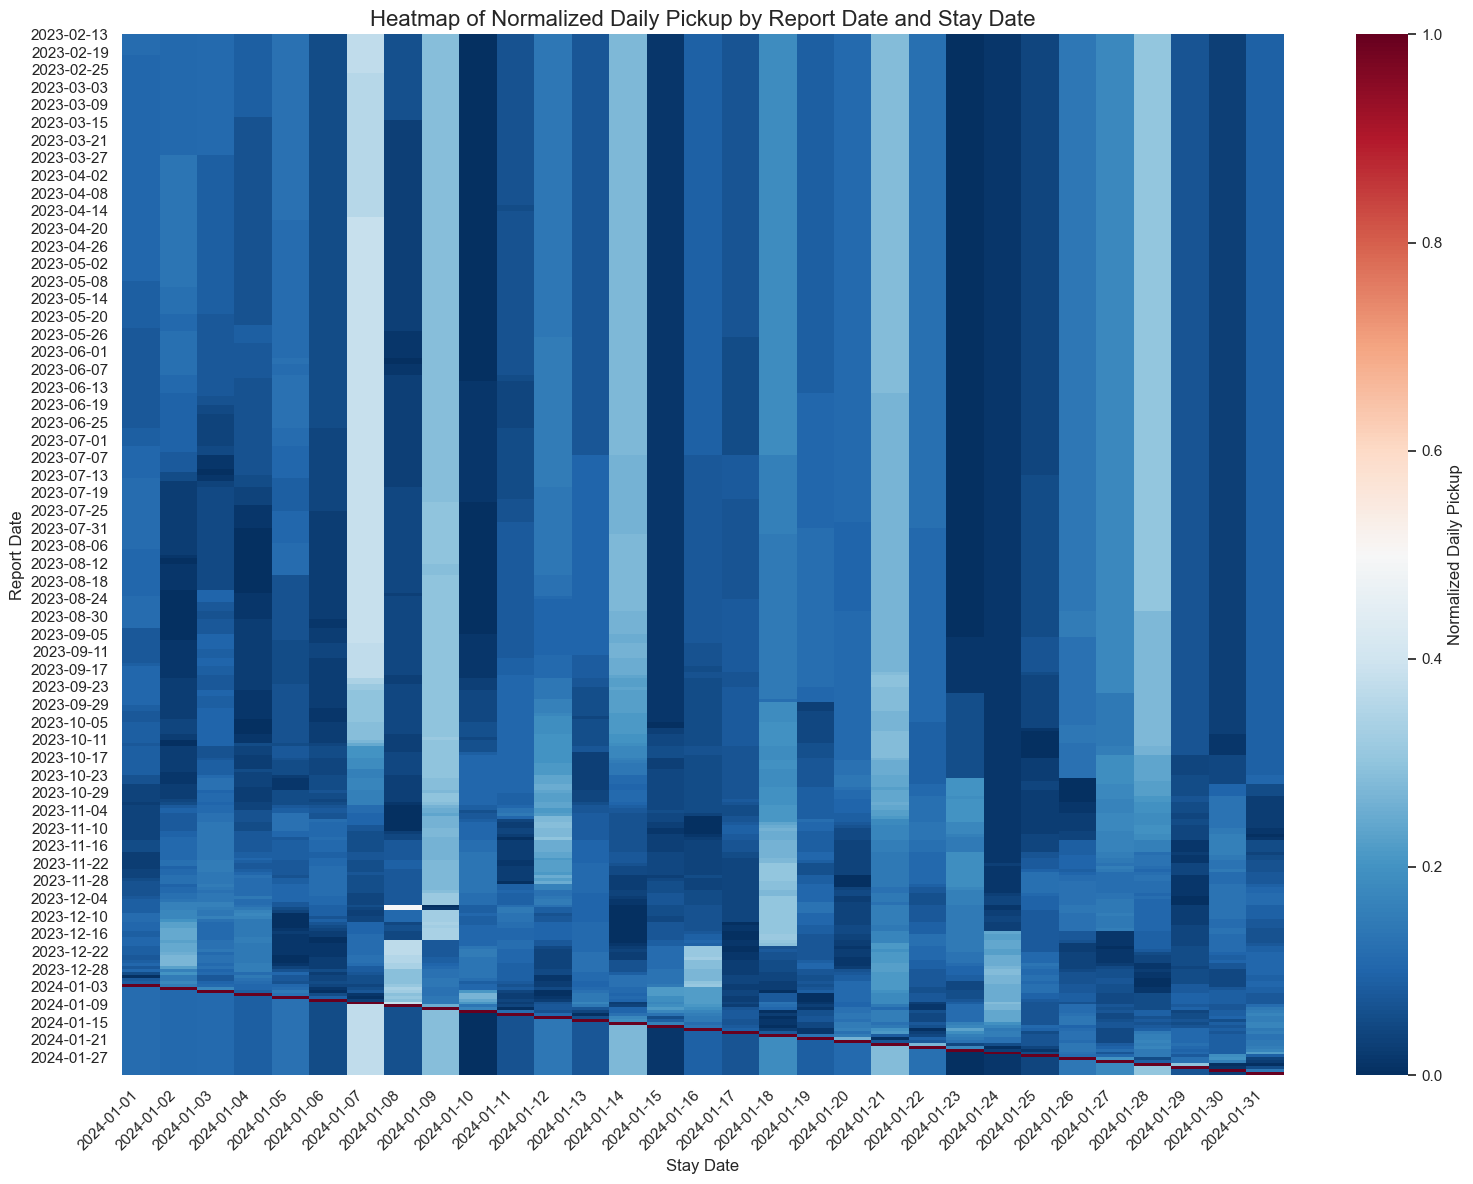

In [83]:
# Filter the data to include only the necessary columns
data = result[['report_date', 'stay_date', 'daily_pickup']]

# Convert 'report_date' and 'stay_date' to datetime format and remove the time
data['report_date'] = pd.to_datetime(data['report_date']).dt.date
data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date

# Filter data for a specific range of stay dates
start_date = '2024-01-01'
end_date = '2024-01-31'
date_range = pd.date_range(start=start_date, end=end_date).date

# Filter the data to include only the specified range of stay dates
filtered_data = data[data['stay_date'].isin(date_range)]

# Create a pivot table with 'daily_pickup' as the values
pivot_data = filtered_data.pivot_table(values='daily_pickup', index='report_date', columns='stay_date', aggfunc='sum')

# Check for NaN values and handle them
if pivot_data.isnull().values.any():
    print("NaN values found in the pivot table. Filling NaN values with 0.")
    pivot_data = pivot_data.fillna(0)

# Debugging: Print the pivot table to check its content
print("Pivot Data:")
print(pivot_data)

# Normalize the data to 0-1 range
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(pivot_data), 
                               index=pivot_data.index, 
                               columns=pivot_data.columns)

# Print available stay dates to ensure the dates are correct
print("Available stay dates:", normalized_data.columns)

# Set up the plot style
sns.set(style="dark")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(16, 12))

# Create the heatmap using seaborn
sns.heatmap(normalized_data, cmap='RdBu_r', annot=False, fmt='.2f', 
            cbar_kws={'label': 'Normalized Daily Pickup'}, ax=ax, vmin=0, vmax=1)

# Set title and labels
ax.set_title('Heatmap of Normalized Daily Pickup by Report Date and Stay Date', fontsize=16)
ax.set_xlabel('Stay Date', fontsize=12)
ax.set_ylabel('Report Date', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove gridlines
ax.grid(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()